In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
import qgrid
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from PIPELINE_CLASS import *

### Leer dataset

In [2]:
PATHDATA_MFFC_AVG = '../../../data/audios_MFCC_average_1000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [3]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y=  np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (10787, 20)




In [4]:
FOLDS = 10
TRAIN_SIZE = 0.8


# RandomForestClassifier

## 1. Mejor modelo

Usamos X_train_original y Y_train__original para seleccionar la mejor combinación de parametros y posteriormente validar dichos res]ultados con el conjunto X_test__original y Y_test__original.

<b>Nota:</b> el conjunto X_train_original se divide en dos conjuntos train y dev a una proporción de 80 a 20.

In [5]:
clases =['yes','no','right','five','nine']
PIPELINE= PIPELINE_MULTIPLES_INST(X,Y,groups,tracks,FOLDS,TRAIN_SIZE,clases)

Número de clases: 5
Número de hablantes diferentes 127
Número de audios diferentes 1000
### Info TRAIN
X (8377, 20)
Groups 101
Tracks 776
### Info TEST
X (2410, 20)
Groups 26
Tracks 224


In [ ]:
df_types = pd.DataFrame({
    'max_depth' : pd.Series([10,10,10,10,10,10,20,20,20,20,20,20,30,30,30,30,30,30]),
    'n_estimators' : pd.Series([400, 600, 800, 1000, 1800, 2000]*3)})

df_types["Eficiencia en train"] = ""
df_types["Intervalo de confianza train"] = ""
df_types["Eficiencia en test"] = ""
df_types["Intervalo de confianza test"] = ""

df_types.set_index(['max_depth','n_estimators'], inplace=True)
models_trained = []
cont = 0
for max_depth,n_estimators in df_types.index:
    RandomTreeModel = RandomForestClassifier(max_depth=int(max_depth),n_estimators=int(n_estimators))
    model_trained,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(RandomTreeModel,label_request=True)
    df_types["Eficiencia en train"][cont] = str(eficiencia_Train)
    df_types["Intervalo de confianza train"][cont] =str(intervalo_Train)
    df_types["Eficiencia en test"][cont]=str(eficiencia_Test)
    df_types["Intervalo de confianza test"][cont]=str(intervalo_Test)
    models_trained.append(model_trained)
    cont = cont +1
    print("############################################")
    print('max_depth',max_depth,'n_estimators',n_estimators)
    print("Efi Train",str(eficiencia_Train))
    print("Std Train",str(intervalo_Train))
    print("Efi Test",str(eficiencia_Test))
    print("Std Test",str(intervalo_Test))
df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 400
Efi Train 0.9433118261343875
Std Train 0.01883053482983449
Efi Test 0.4512962637260552
Std Test 0.03571360842901233


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 600
Efi Train 0.9462401143364897
Std Train 0.016095121900856362
Efi Test 0.4339224564385204
Std Test 0.01363942640254392


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 800
Efi Train 0.9367268957847038
Std Train 0.025536192864574703
Efi Test 0.43364540974841626
Std Test 0.053579217474904066


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 1000
Efi Train 0.9487061557801125
Std Train 0.02041367359306192
Efi Test 0.4390741968965287
Std Test 0.036437162251141395


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 1800
Efi Train 0.9365250970545459
Std Train 0.02574810271457042
Efi Test 0.4220791401652167
Std Test 0.043453712294767285


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 10 n_estimators 2000
Efi Train 0.9493871570982091
Std Train 0.01781533404357789
Efi Test 0.44153048312253257
Std Test 0.03263756813887094


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 400
Efi Train 1.0
Std Train 0.0
Efi Test 0.4961539244881184
Std Test 0.046320269041061624


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 600
Efi Train 1.0
Std Train 0.0
Efi Test 0.48552346031047244
Std Test 0.03111546260950631


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 800
Efi Train 1.0
Std Train 0.0
Efi Test 0.4935106374726751
Std Test 0.03065352539116784


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 1000
Efi Train 1.0
Std Train 0.0
Efi Test 0.495582511814982
Std Test 0.029306966394877624


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 1800
Efi Train 1.0
Std Train 0.0
Efi Test 0.48231505433855554
Std Test 0.049497408724417866


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 20 n_estimators 2000
Efi Train 1.0
Std Train 0.0
Efi Test 0.4959794592519716
Std Test 0.03234273328935621


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 30 n_estimators 400
Efi Train 1.0
Std Train 0.0
Efi Test 0.4926853924829973
Std Test 0.0352821832205531


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 30 n_estimators 600
Efi Train 1.0
Std Train 0.0
Efi Test 0.5034301705388577
Std Test 0.040852112254215485


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 30 n_estimators 800
Efi Train 1.0
Std Train 0.0
Efi Test 0.4846019676439363
Std Test 0.04401581844511163


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


############################################
max_depth 30 n_estimators 1000
Efi Train 1.0
Std Train 0.0
Efi Test 0.4695518309929046
Std Test 0.02390509359346836


/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_trained.fit(X_train_fold,Y_train_fold)
/home/josearangos/Documentos/Projects/Voice_Recognition/pipelines/Enfoque_Múltiples_Instancias/Multiples Instancias Parte 1/PIPELINE_CLASS.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [29]:
qgrid_widget.get_changed_df()

Eficiencia en train Intervalo de confianza train  \
max_depth n_estimators                                                    
10        400                                                             
          600                                                             
          800                                                             
          1000                                                            
          1800                                                            
          2000                                                            
20        400                                                             
          600                                                             
          800                                                             
          1000                                                            
          1800                                                            
          2000                                                            
30        400                                                             
          600                                                             
          800                                                             
          1000                                                            
          1800                                                            
          2000                                                            

                       Eficiencia en test Intervalo de confianza test  
max_depth n_estimators                                                 
10        400                                                          
          600                                                          
          800                                                          
          1000                                                         
          1800                                                         
          2000                                                         
20        400                                                          
          600                                                          
          800                                                          
          1000                                                         
          1800                                                         
          2000                                                         
30        400                                                          
          600                                                          
          800                                                          
          1000                                                         
          1800                                                         
          2000

### La mejor combinación de parametros

In [ ]:
best_model_trained = model_trained[<index_mejor_modelo>]

## 2. Evalución mejor modelo con el conjunto de test

Accuracy:  0.21875 


classification report :
               precision    recall  f1-score   support

         0.0       0.23      0.21      0.22        43
         1.0       0.13      0.18      0.15        44
         2.0       0.30      0.65      0.41        49
         3.0       0.00      0.00      0.00        41
         4.0       0.00      0.00      0.00        47

    accuracy                           0.22       224
   macro avg       0.13      0.21      0.16       224
weighted avg       0.13      0.22      0.16       224



/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


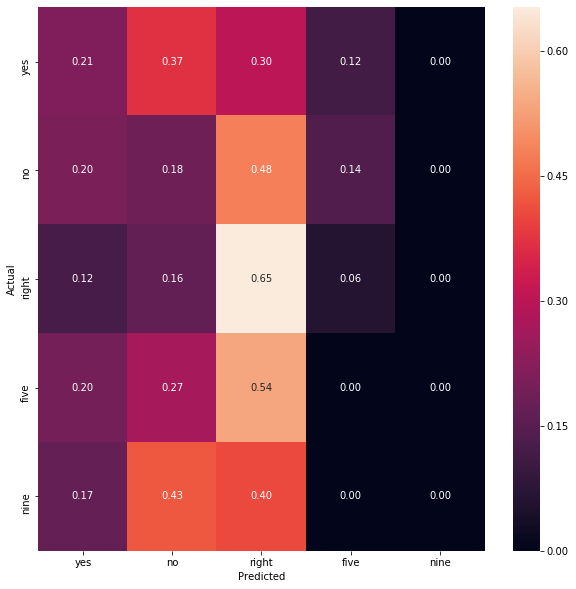

              precision    recall  f1-score   support

         0.0       0.23      0.21      0.22        43
         1.0       0.13      0.18      0.15        44
         2.0       0.30      0.65      0.41        49
         3.0       0.00      0.00      0.00        41
         4.0       0.00      0.00      0.00        47

    accuracy                           0.22       224
   macro avg       0.13      0.21      0.16       224
weighted avg       0.13      0.22      0.16       224



In [7]:
report = PIPELINE.confusion_matrix_Metrics(best_model_trained)
print(report)

## Learning Curve

In [7]:
df_split_params = PIPELINE.learning_curve(best_model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)

NameError: name 'best_model_trained' is not defined